# README

Para las Tareas de la Clase y el proyecto final, se trabajra con una base de datos de sondeos electricos verticales,
los cuales fueron adquiridos durante multiples campañas de exploracion a lo largo de 5 años, los cuales fueron 
procesados e interpretados en cada situacion, particularmente se cuenta con sitios en cullos sondeos se identificaron 
acuiferos, superficiales y profundos, los cuales seran nuestro foco de estudio de este curso.

# Tarea 1 & Tarea 2

Tarea 1

-   Crear, modificar o eliminar columnas
-   Filtrar registros
-   Crear subconjutos de datos
-  Crear grupos de datos 
  
Tarea 2

-   Calcula estadísticos descriptivos básicos para tus datos
-   Haz una matriz de correlación de tus datos y escribe algunas interpretaciones de la misma
-   Realiza alguna prueba de hipótesis a partir de las conclusiones que hayas sacado de la matriz de correlación
-   Presenta tus resultados gráficamente



Para este proyecto se trabajaran con datos de Resisitividad electrica, adquiridos durante campañas de exploracion en 
distintas zonas de mexico, por privacidad y uso practico se realizaron algunos cambios en el nombres de personal y 
ubicaciones geografica (para mejor manejo de los datos se cosidero un cuadrante de la ciudad de San Nicolas De los 
Garza como sitio de estudio).

Los datos constan de los siguinetes elementos:



- Sitio de estudio representado por la clave asignada, numero de sondeo, sitio y localidad o solicitante.
- Personal Tecnico que realizo el levantamiento de los datos
- Fecha de Adquicicion de los Datos
- Zona datum UTM
- Coordenada Este 
- Cooredenada Norte
- Altitud 
- Profundidad de muestreo
- K Factor Geometrico de Arreglo Schlumberger
- Distancia Media entre los Electrodos A y B 
- Distancia entre los Electrodos A y B
- Distancia Media entre los Electrodos M y N
- La quinta parte de la Distancia entre los Electrodos M y N
- Distancia entre los Electrodos M y N
- Potencia Natural 1
- Potencial Inducido 1
- Corrente Inyectada 1
- Potencia Natural 2
- Potencial Inducido 2
- Corrente Inyectada 2
- Potencia Natural 3
- Potencial Inducido 3
- Corrente Inyectada 3
- Media del Potencial Natural
- Media Potencial Inducido
- Media de las Diferencias entre Potencial Inducido y Potencial Natural
- Media de la Correiente Inyectada
- Resistividad electrica Apatente 1
- Resistividad electrica Apatente 2
- Resistividad electrica Apatente 3
- Media de las Resisitividad Electrica 1 2 y 3
- Resisitividad Alectrica Apatente Final


### Preparacion de entorno

se importaran los elementos que se usaran para realizar las tareas 1 y 2.


In [130]:
import pandas as pd 

from IPython.display import Markdown

import numpy as np

import math

In [131]:
BD_RST = pd.read_csv("../Base de Datos Resisterra/DB-RST.csv")

In [132]:
BD_RST.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sitio     647 non-null    object 
 1   OPERADOR  647 non-null    object 
 2   FECHA     647 non-null    object 
 3   ZONA      647 non-null    object 
 4   ESTE      647 non-null    float64
 5   NORTE     647 non-null    float64
 6   ALTITUD   647 non-null    int64  
 7   Z         647 non-null    float64
 8   K         647 non-null    float64
 9   AB/2      647 non-null    float64
 10  AB        647 non-null    int64  
 11  MN/2      647 non-null    float64
 12  AB/5      647 non-null    float64
 13  MN        647 non-null    float64
 14  AB/20     647 non-null    float64
 15  Pn1       647 non-null    float64
 16  Pi1       647 non-null    float64
 17  I1        647 non-null    float64
 18  Pn2       647 non-null    float64
 19  Pi2       647 non-null    float64
 20  I2        647 non-null    float6

Aplicando la siguiente linea podremos observar la tabal correspondeinte a la base de datos BD_RST como tabla en $LaTex$

In [133]:
##  display(Markdown(BD_RST.to_markdown(index=False)))

Creamos una copia de La Base de datos para evitar modificar el documento raiz

In [134]:
DB_copy = BD_RST.copy()

DB_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sitio     647 non-null    object 
 1   OPERADOR  647 non-null    object 
 2   FECHA     647 non-null    object 
 3   ZONA      647 non-null    object 
 4   ESTE      647 non-null    float64
 5   NORTE     647 non-null    float64
 6   ALTITUD   647 non-null    int64  
 7   Z         647 non-null    float64
 8   K         647 non-null    float64
 9   AB/2      647 non-null    float64
 10  AB        647 non-null    int64  
 11  MN/2      647 non-null    float64
 12  AB/5      647 non-null    float64
 13  MN        647 non-null    float64
 14  AB/20     647 non-null    float64
 15  Pn1       647 non-null    float64
 16  Pi1       647 non-null    float64
 17  I1        647 non-null    float64
 18  Pn2       647 non-null    float64
 19  Pi2       647 non-null    float64
 20  I2        647 non-null    float6

Eliminaremos columnas que no son relevantes para el estudio como son AB/5, AB/20, PPn, PPi, PU, PI, Rha, Rha, Rha, Prom-Rha;
Para poder Realizar esta accion usaremos $.drop$

In [135]:
DB_copy.drop(columns = ['AB/5', 'AB/20', 'PPn', 'PPi', 'PU', 'PI', 'Rha', 'Rha', 'Rha', 'Prom-Rha'], inplace = True)

In [136]:
DB_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sitio     647 non-null    object 
 1   OPERADOR  647 non-null    object 
 2   FECHA     647 non-null    object 
 3   ZONA      647 non-null    object 
 4   ESTE      647 non-null    float64
 5   NORTE     647 non-null    float64
 6   ALTITUD   647 non-null    int64  
 7   Z         647 non-null    float64
 8   K         647 non-null    float64
 9   AB/2      647 non-null    float64
 10  AB        647 non-null    int64  
 11  MN/2      647 non-null    float64
 12  MN        647 non-null    float64
 13  Pn1       647 non-null    float64
 14  Pi1       647 non-null    float64
 15  I1        647 non-null    float64
 16  Pn2       647 non-null    float64
 17  Pi2       647 non-null    float64
 18  I2        647 non-null    float64
 19  Pn3       647 non-null    float64
 20  Pi3       646 non-null    float6

In [137]:
DB_copy

,sitio,OPERADOR,FECHA,ZONA,ESTE,NORTE,ALTITUD,Z,K,AB/2,...,I1,Pn2,Pi2,I2,Pn3,Pi3,I3,Rha.1,Rha.2,Real-Rha
0,S1-TV-VLH,JOSE JAVIER TOVON SANCHEZ,05/11/2003,14R,370462.31,2850554.93,489,1.8,56.549,3.0,...,136.0,-11.0,30.0,137.0,-11.0,31.0,137.0,16.9000,17.3,17.24
1,S1-TV-VLH,JOSE JAVIER TOVON SANCHEZ,05/11/2003,14R,370462.31,2850554.93,489,2.4,100.531,4.0,...,122.0,-11.0,20.0,121.0,-11.0,21.0,122.0,25.8000,26.4,25.89
2,S1-TV-VLH,JOSE JAVIER TOVON SANCHEZ,05/11/2003,14R,370462.31,2850554.93,489,3.0,157.080,5.0,...,81.0,-10.0,14.0,78.0,-10.0,14.0,77.0,48.3000,49,47.94
3,S1-TV-VLH,JOSE JAVIER TOVON SANCHEZ,05/11/2003,14R,370462.31,2850554.93,489,3.0,31.416,5.0,...,165.0,-32.0,12.0,166.0,-32.0,13.0,165.0,8.3000,8.6,8.49
4,S1-TV-VLH,JOSE JAVIER TOVON SANCHEZ,05/11/2003,14R,370462.31,2850554.93,489,4.8,80.425,8.0,...,158.0,-33.0,13.0,157.0,-33.0,14.0,158.0,23.6000,23.9,23.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,S3-HIGA,IRVIN RAMIREZ PEREZ,12/10/2022,14R,370645.67,2848071.60,502,78.0,2638.938,130.0,...,792.0,-49.0,-47.0,798.0,-49.0,-43.0,804.0,19.7920,19.6447,17.57
643,S3-HIGA,IRVIN RAMIREZ PEREZ,12/10/2022,14R,370645.67,2848071.60,502,84.0,3063.053,140.0,...,458.0,-47.0,-43.0,484.0,-47.0,-44.0,461.0,19.2645,19.0252,21.61
644,S3-HIGA,IRVIN RAMIREZ PEREZ,12/10/2022,14R,370645.67,2848071.60,502,90.0,3518.584,150.0,...,745.0,-46.0,-42.0,738.0,-46.0,-42.0,751.0,18.8664,19.7951,18.98
645,S3-HIGA,IRVIN RAMIREZ PEREZ,12/10/2022,14R,370645.67,2848071.60,502,102.0,4523.893,170.0,...,731.0,-45.0,-41.0,751.0,-45.0,-41.0,733.0,24.7545,24.553,24.61


Como primer paso reagruparemos la informacion a fin de visualizar primero los Datos que queremos separar.

Acontinuacion crearemos una Data Frame en el cual se integraran los archivos de posicion geografica para, afin de generar una visualizacion del sitio de estudio, en el caso particular, todos lo spuntos se agruparon en un area correspondeitne al municipio de san nicolas de los garzar, con la finalidad de supervisar la respuesta y la relacion entre los comportamientos y respues geoelectrica.

In [138]:
geo_DB = DB_copy.groupby( ['sitio','ZONA','ESTE','NORTE','ALTITUD'])
  
geo_DB.first()


,,,,,OPERADOR,FECHA,Z,K,AB/2,AB,MN/2,MN,Pn1,Pi1,I1,Pn2,Pi2,I2,Pn3,Pi3,I3,Rha.1,Rha.2,Real-Rha
sitio,ZONA,ESTE,NORTE,ALTITUD,,,,,,,,,,,,,,,,,,,,
S1-AMEBSA,14R,370089.22,2849714.46,495,JOSE JAVIER TOVON SANCHEZ,09/08/2004,0.6,3.141593,1.0,2,0.50,1.0,19.6,176.0,-9.5,20.0,175.0,-9.5,19.7,174.0,-9.5,-51.300000,14865.4,8827.00
S1-BMEBSA,14R,368966.92,2848868.32,504,JOSE JAVIER TOVON SANCHEZ,13/04/2006,0.6,3.141593,1.0,2,0.50,1.0,37.0,150.0,13.0,31.0,153.0,12.0,31.0,153.0,12.0,31.900000,31.9,28.44
S1-HIGA,14R,371282.17,2848586.46,495,JOSE JAVIER TOVON SANCHEZ,10/10/2022,4.2,75.398000,7.0,14,1.00,2.0,-34.0,-25.0,48.0,-35.0,-25.0,48.0,-36.0,-26.0,48.0,15.708000,15.708,15.45
S1-IXCA,14R,371188.96,2849350.46,492,IRVIN RAMIREZ PEREZ,11/08/2020,4.2,75.398000,7.0,14,1.00,2.0,86.0,158.0,301.0,82.0,159.0,201.0,76.0,147.0,297.0,18.340100,18.5279,18.25
S1-MOR,14R,371497.03,2850196.37,486,JOSE JAVIER TOVON SANCHEZ,03/02/2021,4.2,75.400000,7.0,14,1.00,2.0,-200.0,411.0,181.0,-195.0,465.0,162.0,-194.0,322.0,155.0,259.036800,252.9181,264.93
S1-TLACO,14R,371669.76,2849650.58,490,JOSE JAVIER TOVON SANCHEZ,05/02/2021,4.2,75.400000,7.0,14,1.00,2.0,-31.0,-25.0,8.0,-29.0,-23.0,9.0,-30.0,-24.0,8.0,58.643100,#¡DIV/0!,55.71
S1-TV-VLH,14R,370462.31,2850554.93,489,JOSE JAVIER TOVON SANCHEZ,05/11/2003,1.8,56.549000,3.0,6,0.25,0.5,-11.0,31.0,136.0,-11.0,30.0,137.0,-11.0,31.0,137.0,16.900000,17.3,17.24
S1-ZAUTLA,14R,370965.91,2849902.27,491,JOSE JAVIER TOVON SANCHEZ,20/09/2010,1.2,12.566000,2.0,4,1.00,2.0,22.0,1747.0,206.0,1.0,1743.0,209.0,9.0,1763.0,207.0,106.288000,106.4803,105.92
S1AP-EB,14R,370592.78,2849118.76,498,JOSE JAVIER TOVON SANCHEZ,13/06/2020,0.6,3.141590,1.0,2,0.50,1.0,22.0,2120.0,73.0,22.0,2120.0,85.0,22.0,2120.0,83.0,77.541899,79.41037816,75.96


In [139]:
## NOTA no se puede generar una nueva tabla aprtir de de .groupby generados, tendra que ser desde el DF origen.

GEO_position = DB_copy.loc[0:646,['sitio','ZONA','ESTE','NORTE','ALTITUD']]

In [140]:
GEO_position

,sitio,ZONA,ESTE,NORTE,ALTITUD
0,S1-TV-VLH,14R,370462.31,2850554.93,489
1,S1-TV-VLH,14R,370462.31,2850554.93,489
2,S1-TV-VLH,14R,370462.31,2850554.93,489
3,S1-TV-VLH,14R,370462.31,2850554.93,489
4,S1-TV-VLH,14R,370462.31,2850554.93,489
...,...,...,...,...,...
642,S3-HIGA,14R,370645.67,2848071.60,502
643,S3-HIGA,14R,370645.67,2848071.60,502
644,S3-HIGA,14R,370645.67,2848071.60,502
645,S3-HIGA,14R,370645.67,2848071.60,502


generaremos un archivo solo con los datos de salida relevantes para este estudio. y generaremos una copia para trabajar con ella

In [141]:
res_geo = DB_copy.loc[0:646,['sitio','ESTE','NORTE','ALTITUD','Z','AB','MN','Real-Rha']]

res_geo_copy = res_geo.copy()

Renombraremos la columna Real-Rha por res_ap

In [142]:
res_geo_copy.rename(columns={'Real-Rha':'res_ap'},inplace=True)

res_geo_copy.rename(columns={'res_ap':'Rha'},inplace=True)






df = res_geo_copy

df_mask=df['Rha']<3000
filtered_df = df[df_mask]
#print(filtered_df)

df2 = filtered_df
df_mask2=df2['Rha']>0
res_geo_copy2 = df2[df_mask2]
print(filtered_df)


res_geo_copy =res_geo_copy2


         sitio       ESTE       NORTE  ALTITUD      Z   AB    MN    Rha
0    S1-TV-VLH  370462.31  2850554.93      489    1.8    6   0.5  17.24
1    S1-TV-VLH  370462.31  2850554.93      489    2.4    8   0.5  25.89
2    S1-TV-VLH  370462.31  2850554.93      489    3.0   10   0.5  47.94
3    S1-TV-VLH  370462.31  2850554.93      489    3.0   10   2.5   8.49
4    S1-TV-VLH  370462.31  2850554.93      489    4.8   16   2.5  23.63
..         ...        ...         ...      ...    ...  ...   ...    ...
642    S3-HIGA  370645.67  2848071.60      502   78.0  260  20.0  17.57
643    S3-HIGA  370645.67  2848071.60      502   84.0  280  20.0  21.61
644    S3-HIGA  370645.67  2848071.60      502   90.0  300  20.0  18.98
645    S3-HIGA  370645.67  2848071.60      502  102.0  340  20.0  24.61
646    S3-HIGA  370645.67  2848071.60      502  120.0  400  20.0  22.53

[618 rows x 8 columns]


Generaremos la estadistica para los siguientes datos: Z, AB, MN, Real-Rha.

llamamos a cada columna por separado y la asignamos a una variable definida

In [143]:
##llamamos cada colubna que trabajaremos
pro_exploracion = res_geo_copy.Z
apertura_ab = res_geo_copy.AB 
apertura_mn = res_geo_copy.MN 
resisitividad = res_geo_copy.Rha
## eliminamos las posiciones que precentan ceros para evitar influir en la estadistica
resisitividad.fillna(0, inplace=True) #---> no fue  necesario hacerlo

## generamos listas de cada columna
#list_pro_exploracion = list(pro_exploracion)
#list_apertura_ab = list(apertura_ab)
#list_pertura_mn = list(apertura_mn)
#list_resisitividad = list(resisitividad)


C:\Users\juanj\AppData\Local\Temp\ipykernel_2780\644052175.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resisitividad.fillna(0, inplace=True) #---> no fue  necesario hacerlo


In [144]:
res_geo_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616 entries, 0 to 646
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sitio    616 non-null    object 
 1   ESTE     616 non-null    float64
 2   NORTE    616 non-null    float64
 3   ALTITUD  616 non-null    int64  
 4   Z        616 non-null    float64
 5   AB       616 non-null    int64  
 6   MN       616 non-null    float64
 7   Rha      616 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 43.3+ KB


In [145]:
res_geo_copy.describe()


,ESTE,NORTE,ALTITUD,Z,AB,MN,Rha
count,616.000000,6.160000e+02,616.000000,616.000000,616.000000,616.000000,616.000000
mean,370560.300000,2.849349e+06,495.366883,42.870292,142.900974,10.139610,333.450097
std,793.380856,6.941879e+02,5.005864,54.174873,180.582909,11.298715,551.516052
min,368966.920000,2.848072e+06,486.000000,0.600000,2.000000,0.500000,0.380000
25%,369975.800000,2.848816e+06,491.000000,6.000000,20.000000,4.375000,27.917500
50%,370645.670000,2.849338e+06,495.000000,24.000000,80.000000,5.000000,108.940000
75%,371212.262500,2.849902e+06,500.000000,57.000000,190.000000,20.000000,297.190000
max,371852.460000,2.850555e+06,504.000000,300.000000,1000.000000,100.000000,2781.760000


## Estadistica  descriptiva basica de Profundidades y resistividades



In [146]:
import statistics

In [147]:

media_Rha = statistics.mean(res_geo_copy.Rha)
media_flot_Rha = statistics.fmean(res_geo_copy.Rha)
media_baja_Rha = statistics.median_low(res_geo_copy.Rha)
media_alta_Rha = statistics.median_high(res_geo_copy.Rha)
moda_Rha = statistics.mode(res_geo_copy.Rha)
cuartiles_Rha = statistics.quantiles(res_geo_copy.Rha, n=4)
varianza_Rha = statistics.variance(res_geo_copy.Rha)
desviacion_est_Rha = statistics.stdev(res_geo_copy.Rha)
valor_max_Rha = max(res_geo_copy.Rha)
valor_min_Rha = min(res_geo_copy.Rha)


la desviacion estandar es demasiado alta

In [148]:
print('media= ',media_Rha)
print('media con flotante= ',media_flot_Rha)
print('media baja de los datos= ', media_baja_Rha)
print('media alta de los datos= ', media_alta_Rha)
print('moda= ', moda_Rha)
print('cuartiles= ', cuartiles_Rha)
print('varianza= ', varianza_Rha)
print('desviacion estandar= ', desviacion_est_Rha)
print('valor maximo= ', valor_max_Rha)
print('valor minimo= ', valor_min_Rha)

media=  333.4500974025974
media con flotante=  333.4500974025974
media baja de los datos=  108.79
media alta de los datos=  109.09
moda=  12.87
cuartiles=  [27.8925, 108.94, 298.90999999999997]
varianza=  304169.9552565759
desviacion estandar=  551.5160516762644
valor maximo=  2781.76
valor minimo=  0.38


In [149]:
import matplotlib.pyplot as plt

normalizacion de las variables

In [190]:
Rha_pre = res_geo_copy["Rha"]

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
lip =np.array([Rha_pre]).reshape(-1,1)
scaler = MinMaxScaler()
Rha_nor = scaler.fit_transform(lip)

RhaNor= pd.DataFrame(Rha_nor)

res_geo_copy['RhaN']=RhaNor
res_geo_copy


,sitio,ESTE,NORTE,ALTITUD,Z,AB,MN,Rha,RhaN
0,S1-TV-VLH,370462.31,2850554.93,489,1.8,6,0.5,17.24,0.006062
1,S1-TV-VLH,370462.31,2850554.93,489,2.4,8,0.5,25.89,0.009172
2,S1-TV-VLH,370462.31,2850554.93,489,3.0,10,0.5,47.94,0.017099
3,S1-TV-VLH,370462.31,2850554.93,489,3.0,10,2.5,8.49,0.002916
4,S1-TV-VLH,370462.31,2850554.93,489,4.8,16,2.5,23.63,0.008359
...,...,...,...,...,...,...,...,...,...
642,S3-HIGA,370645.67,2848071.60,502,78.0,260,20.0,17.57,NaN
643,S3-HIGA,370645.67,2848071.60,502,84.0,280,20.0,21.61,NaN
644,S3-HIGA,370645.67,2848071.60,502,90.0,300,20.0,18.98,NaN
645,S3-HIGA,370645.67,2848071.60,502,102.0,340,20.0,24.61,NaN


visualizaremos los datos mediante histogramas para identificar las frecuencias

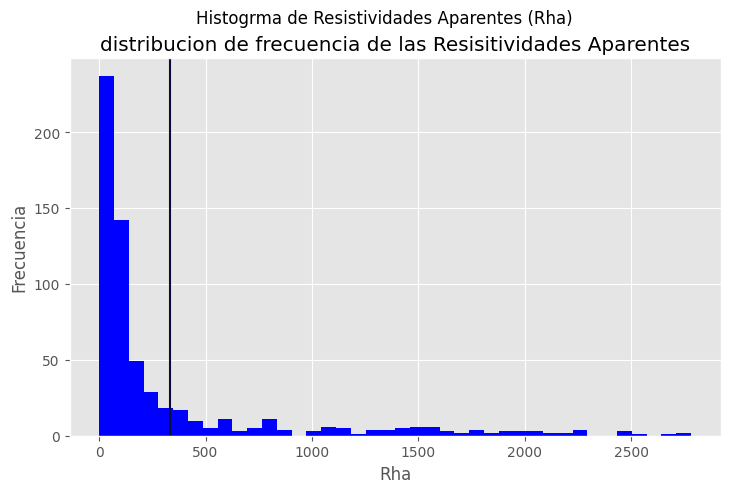

In [200]:
plt.figure(figsize = (8.4, 4.9))
plt.hist(res_geo_copy.Rha, bins=40, color='blue')
plt.axvline(
    x = media_Rha,
    c='#0B0B3B',
    label = '$\\bar{x}$'
)

plt.title('distribucion de frecuencia de las Resisitividades Aparentes')
plt.suptitle('Histogrma de Resistividades Aparentes (Rha)')
plt.xlabel('Rha')
plt.ylabel('Frecuencia')
#plt.savefig('../Articulo/histogram_Rha.png')
plt.show()


ya qye no nos aporta informcaion tendremos que filtrar todos los valores por arriba de 2000 ohm*m

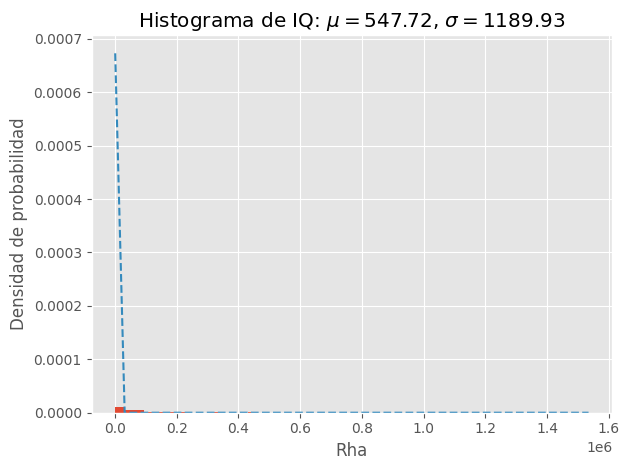

In [199]:



# example data
mu = media_Rha  # mean of distribution
sigma = desviacion_est_Rha  # standard deviation of distribution
x = mu + sigma * res_geo_copy.Rha[:]

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Rha')
ax.set_ylabel('Densidad de probabilidad')
ax.set_title(r'Histograma de IQ: $\mu=547.72$, $\sigma=1189.93$')

# Tweak spacing to prevent clipping of ylabel@
fig.tight_layout()
plt.show()

apartir de la distribucion de las frecias podemos definir los datos como no parametricos ya que no siguen una tendencia normal 

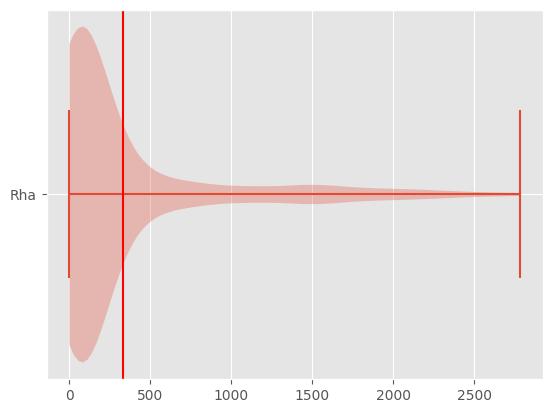

In [198]:
plt.figure()
plt.violinplot(res_geo_copy.Rha, vert=False)
plt.axvline( # Dibujar una línea vertical
    x = media_Rha, # En la media de los datos
    c = '#ff0000', # De color hexadecimal rojo
    label = '$\\bar{x}$' # con este identificador
)
plt.yticks([1], labels=['Rha'])

plt.show()

### Matrix de correlacion 


In [154]:
import calplot
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np
res_geo_copy.columns

Index(['sitio', 'ESTE', 'NORTE', 'ALTITUD', 'Z', 'AB', 'MN', 'Rha', 'RhaN'], dtype='object')

In [155]:

df_res_geo = res_geo_copy.pivot_table('Rha',['ESTE', 'NORTE'], 'Z')
df_res_geo

,Z,0.6,0.9,1.2,1.8,2.4,3.0,4.2,4.8,5.4,6.0,...,132.0,138.0,144.0,150.0,156.0,180.0,210.0,240.0,270.0,300.0
ESTE,NORTE,,,,,,,,,,,,,,,,,,,,,
368966.92,2848868.32,28.44,NaN,78.025,NaN,NaN,253.700,837.50,1127.31,1632.77,408.035,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369168.62,2849201.65,4.08,NaN,2.100,NaN,NaN,19.120,37.46,NaN,59.28,231.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369285.27,2849541.66,386.24,NaN,482.650,NaN,1147.73,767.010,557.15,656.85,443.77,396.490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369390.35,2849887.03,532.31,NaN,823.820,NaN,800.90,1019.710,716.54,638.22,367.57,286.410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369421.77,2850209.05,87.80,NaN,95.970,NaN,182.07,31.400,34.87,40.21,43.03,40.765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369430.09,2850473.94,9.42,NaN,14.210,NaN,NaN,19.530,NaN,24.75,NaN,22.340,...,NaN,138.12,NaN,132.195,NaN,207.130,207.13,132.81,NaN,NaN
369736.22,2848626.09,0.38,NaN,1.230,NaN,NaN,6.230,12.75,17.14,351.40,272.610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369854.95,2848990.42,140.66,NaN,60.705,NaN,NaN,130.530,NaN,2288.34,1721.36,1068.520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369975.80,2849338.50,33.49,NaN,64.125,NaN,NaN,393.950,384.02,566.35,249.84,255.910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 640x480 with 0 Axes>

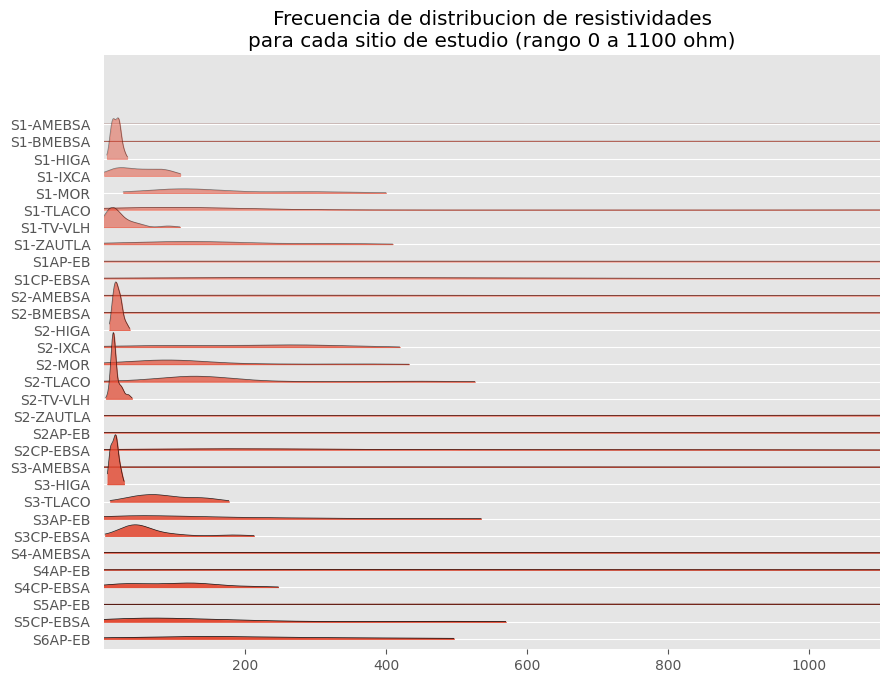

In [197]:
from joypy import joyplot

plt.figure()
joyplot(res_geo_copy, by='sitio', column='Rha',
        grid='y',
        kind="kde",  
        range_style='own', tails=0.2,
        linewidth=.5, 
        figsize=(9,7), 
        fade=True, 
        legend=False, 
        x_range=[0,1100],
        title="Frecuencia de distribucion de resistividades\npara cada sitio de estudio (rango 0 a 1100 ohm)",
        )
plt.show()


In [157]:
corr_ = df_res_geo.corr()
corr_

Z,0.6,0.9,1.2,1.8,2.4,3.0,4.2,4.8,5.4,6.0,...,132.0,138.0,144.0,150.0,156.0,180.0,210.0,240.0,270.0,300.0
Z,,,,,,,,,,,,,,,,,,,,,
0.6,1.000000,NaN,0.972396,NaN,0.880772,0.924583,0.656708,0.204490,-0.074740,0.404796,...,NaN,1.0,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN
0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.2,0.972396,NaN,1.000000,NaN,0.854238,0.894291,0.612240,0.087236,-0.150023,0.243909,...,NaN,1.0,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN
1.8,NaN,NaN,NaN,1.0,-1.000000,-1.000000,NaN,-1.000000,NaN,-1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.4,0.880772,NaN,0.854238,-1.0,1.000000,0.866990,0.724697,0.909467,0.983415,0.620411,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,0.924583,NaN,0.894291,-1.0,0.866990,1.000000,0.805768,0.240324,-0.077232,0.367883,...,NaN,1.0,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN
4.2,0.656708,NaN,0.612240,NaN,0.724697,0.805768,1.000000,0.906224,0.725109,0.780333,...,1.0,NaN,1.0,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
4.8,0.204490,NaN,0.087236,-1.0,0.909467,0.240324,0.906224,1.000000,0.871414,0.958673,...,NaN,1.0,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
5.4,-0.074740,NaN,-0.150023,NaN,0.983415,-0.077232,0.725109,0.871414,1.000000,0.807793,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


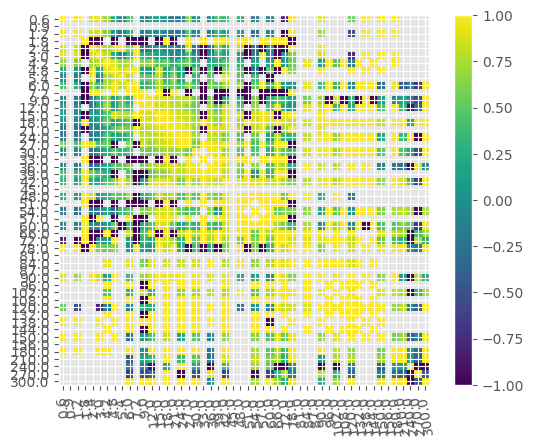

In [196]:
corr_ = df_res_geo.corr()

ticks_ = list(range(len(df_res_geo.columns)))
plt.figure()
plt.imshow(corr_)
plt.xticks(ticks = ticks_, labels = df_res_geo.columns, rotation =100)
plt.yticks(ticks = ticks_, labels = df_res_geo.columns)
plt.clim(vmin = -1, vmax =1)
plt.colorbar()
plt.show()

apartir de la prueva de correlacion se puedo identificar el siguiente comportamiento

1.- Tenemos una alta correlacion entre los valores de la prueva, entre la profundidad y el aumento de la resistividad, este comportamiento es consistente con los valores

2.- En cuanto a los valores de baja correlacion, nos aportan informacion valiosa ya que pueden estar representando una anomalia en la distribucion esperada, traduciendose una dispercion de valores de Rha, es decir una baja correalacion de los valores, representando valores de interes para la exploracion geohidrica.

3.- En cuanto a la distribucion se deben considerar como datos no parametricos, mucho mas similares a una distribucion de tipo Gamma 

### Prueva de hipotesis

¿tienen los sitios de estudio una desviacion estandar similar cuanto mas profundo se explora? 

1.- Generaremos las desviaciones estandar para cada sitio de estudio

2.- Graficaremos los resultados

3.- Emplearemos Test de permutaciones para realizar un test de significancia para cada sitio.

In [159]:
# Nombres de todos los sitios de estudio precentes en el trabajo
res_geo_copy['sitio'].unique()

array(['S1-TV-VLH', 'S2-TV-VLH', 'S1-AMEBSA', 'S2-AMEBSA', 'S3-AMEBSA',
       'S4-AMEBSA', 'S1-BMEBSA', 'S2-BMEBSA', 'S1CP-EBSA', 'S2CP-EBSA',
       'S3CP-EBSA', 'S4CP-EBSA', 'S5CP-EBSA', 'S1-ZAUTLA', 'S2-ZAUTLA',
       'S1AP-EB', 'S2AP-EB', 'S3AP-EB', 'S4AP-EB', 'S5AP-EB', 'S6AP-EB',
       'S1-IXCA', 'S2-IXCA', 'S1-MOR', 'S2-MOR', 'S1-TLACO', 'S2-TLACO',
       'S3-TLACO', 'S1-HIGA', 'S2-HIGA', 'S3-HIGA'], dtype=object)

In [160]:
s1_res = res_geo_copy[res_geo_copy.sitio == 'S1-TV-VLH']
de_s1 = statistics.stdev(s1_res.Rha)
s1_res['dst']=de_s1

s2_res = res_geo_copy[res_geo_copy.sitio == 'S2-TV-VLH']
de_s2 = statistics.stdev(s2_res.Rha)
s2_res['dst']=de_s2

s3_res = res_geo_copy[res_geo_copy.sitio == 'S1-AMEBSA']
de_s3 = statistics.stdev(s3_res.Rha)
s3_res['dst']=de_s3

s4_res = res_geo_copy[res_geo_copy.sitio == 'S2-AMEBSA']
de_s4 = statistics.stdev(s4_res.Rha)
s4_res['dst']=de_s4

s5_res = res_geo_copy[res_geo_copy.sitio == 'S3-AMEBSA']
de_s5 = statistics.stdev(s5_res.Rha)
s5_res['dst']=de_s5

s6_res = res_geo_copy[res_geo_copy.sitio == 'S4-AMEBSA']
de_s6 = statistics.stdev(s6_res.Rha)
s6_res['dst']=de_s6

s7_res = res_geo_copy[res_geo_copy.sitio == 'S1CP-EBSA']
de_s7 = statistics.stdev(s7_res.Rha)
s7_res['dst']=de_s7

s8_res = res_geo_copy[res_geo_copy.sitio == 'S2CP-EBSA']
de_s8 = statistics.stdev(s8_res.Rha)
s8_res['dst']=de_s8

s9_res = res_geo_copy[res_geo_copy.sitio == 'S3CP-EBSA']
de_s9 = statistics.stdev(s9_res.Rha)
s9_res['dst']=de_s9

s10_res = res_geo_copy[res_geo_copy.sitio == 'S4CP-EBSA']
de_s10 = statistics.stdev(s10_res.Rha)
s10_res['dst']=de_s10

s11_res = res_geo_copy[res_geo_copy.sitio == 'S5CP-EBSA']
de_s11 = statistics.stdev(s11_res.Rha)
s11_res['dst']=de_s11

s12_res = res_geo_copy[res_geo_copy.sitio == 'S1-ZAUTLA']
de_s12 = statistics.stdev(s12_res.Rha)
s12_res['dst']=de_s12

s13_res = res_geo_copy[res_geo_copy.sitio == 'S2-ZAUTLA']
de_s13 = statistics.stdev(s13_res.Rha)
s13_res['dst']=de_s13

s14_res = res_geo_copy[res_geo_copy.sitio == 'S1AP-EB']
de_s14 = statistics.stdev(s14_res.Rha)
s14_res['dst']=de_s14

s15_res = res_geo_copy[res_geo_copy.sitio == 'S2AP-EB']
de_s15 = statistics.stdev(s15_res.Rha)
s15_res['dst']=de_s15

s16_res = res_geo_copy[res_geo_copy.sitio == 'S3AP-EB']
de_s16 = statistics.stdev(s16_res.Rha)
s16_res['dst']=de_s16

s17_res = res_geo_copy[res_geo_copy.sitio == 'S4AP-EB']
de_s17 = statistics.stdev(s17_res.Rha)
s17_res['dst']=de_s17

s18_res = res_geo_copy[res_geo_copy.sitio == 'S5AP-EB']
de_s18 = statistics.stdev(s18_res.Rha)
s18_res['dst']=de_s18

s19_res = res_geo_copy[res_geo_copy.sitio == 'S6AP-EB']
de_s19 = statistics.stdev(s19_res.Rha)
s19_res['dst']=de_s19

s20_res = res_geo_copy[res_geo_copy.sitio == 'S1-IXCA']
de_s20 = statistics.stdev(s20_res.Rha)
s20_res['dst']=de_s20

s21_res = res_geo_copy[res_geo_copy.sitio == 'S2-IXCA']
de_s21 = statistics.stdev(s21_res.Rha)
s21_res['dst']=de_s21

s22_res = res_geo_copy[res_geo_copy.sitio == 'S1-MOR']
de_s22 = statistics.stdev(s22_res.Rha)
s22_res['dst']=de_s22

s23_res = res_geo_copy[res_geo_copy.sitio == 'S2-MOR']
de_s23 = statistics.stdev(s23_res.Rha)
s23_res['dst']=de_s23

s24_res = res_geo_copy[res_geo_copy.sitio == 'S1-TLACO']
de_s24 = statistics.stdev(s24_res.Rha)
s24_res['dst']=de_s24

s25_res = res_geo_copy[res_geo_copy.sitio == 'S2-TLACO']
de_s25 = statistics.stdev(s25_res.Rha)
s25_res['dst']=de_s25

s26_res = res_geo_copy[res_geo_copy.sitio == 'S3-TLACO']
de_s26 = statistics.stdev(s26_res.Rha)
s26_res['dst']=de_s26

s27_res = res_geo_copy[res_geo_copy.sitio == 'S1-HIGA']
de_s27 = statistics.stdev(s27_res.Rha)
s27_res['dst']=de_s27

s28_res = res_geo_copy[res_geo_copy.sitio == 'S2-HIGA']
de_s28 = statistics.stdev(s28_res.Rha)
s28_res['dst']=de_s28

s29_res = res_geo_copy[res_geo_copy.sitio == 'S3-HIGA']
de_s29 = statistics.stdev(s29_res.Rha)
s29_res['dst']=de_s29


C:\Users\juanj\AppData\Local\Temp\ipykernel_2780\494572061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s1_res['dst']=de_s1
C:\Users\juanj\AppData\Local\Temp\ipykernel_2780\494572061.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2_res['dst']=de_s2
C:\Users\juanj\AppData\Local\Temp\ipykernel_2780\494572061.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

ATENCION

generaremos dos df agrupando en la primera todos los sitios y en la segunda unicamente los sondeos correspondientes a una misma area de estudio, por lo que se espera tengan un comportamiento estadistico similar y que emplearemos para el entrenamiento no supervisado y supervisado.

In [161]:
import pandas as pd

frames =[s1_res, s2_res, s3_res, s4_res, s5_res, s6_res, s7_res, s8_res, s9_res, s10_res,
         s11_res, s12_res, s13_res, s14_res, s15_res, s16_res, s17_res, s18_res, s19_res,
         s20_res, s21_res, s22_res, s23_res, s24_res, s25_res, s26_res, s27_res, s28_res, s29_res]

res_dst =pd.concat(frames)

frames2 = [s27_res, s28_res, s29_res]

pre_higa = pd.concat(frames2)

pre_higa.info()

higa = pre_higa.loc[581:646,['AB','Rha']]

higa





<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 581 to 646
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sitio    66 non-null     object 
 1   ESTE     66 non-null     float64
 2   NORTE    66 non-null     float64
 3   ALTITUD  66 non-null     int64  
 4   Z        66 non-null     float64
 5   AB       66 non-null     int64  
 6   MN       66 non-null     float64
 7   Rha      66 non-null     float64
 8   RhaN     35 non-null     float64
 9   dst      66 non-null     float64
dtypes: float64(7), int64(2), object(1)
memory usage: 5.7+ KB


,AB,Rha
581,14,15.45
582,20,14.22
583,20,11.67
584,30,7.72
585,40,9.53
...,...,...
642,260,17.57
643,280,21.61
644,300,18.98
645,340,24.61


normalizaremos la variable Rha primero

In [162]:
# Tratamiento de datos FUENTE=  https://www.cienciadedatos.net/documentos/pystats03-test-permutacion-python.html
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Configuración matplotlib
# ==============================================================================
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Varios
# ==============================================================================
from tqdm import tqdm

In [163]:
datos = res_dst.copy()
datos.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 646
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sitio    583 non-null    object 
 1   ESTE     583 non-null    float64
 2   NORTE    583 non-null    float64
 3   ALTITUD  583 non-null    int64  
 4   Z        583 non-null    float64
 5   AB       583 non-null    int64  
 6   MN       583 non-null    float64
 7   Rha      583 non-null    float64
 8   RhaN     552 non-null    float64
 9   dst      583 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 50.1+ KB


La variable  "datos" contien la Resistividad Apatente Normalizada RhaN y la Desviacion Estandar dst correspondiente a cada sub grupo

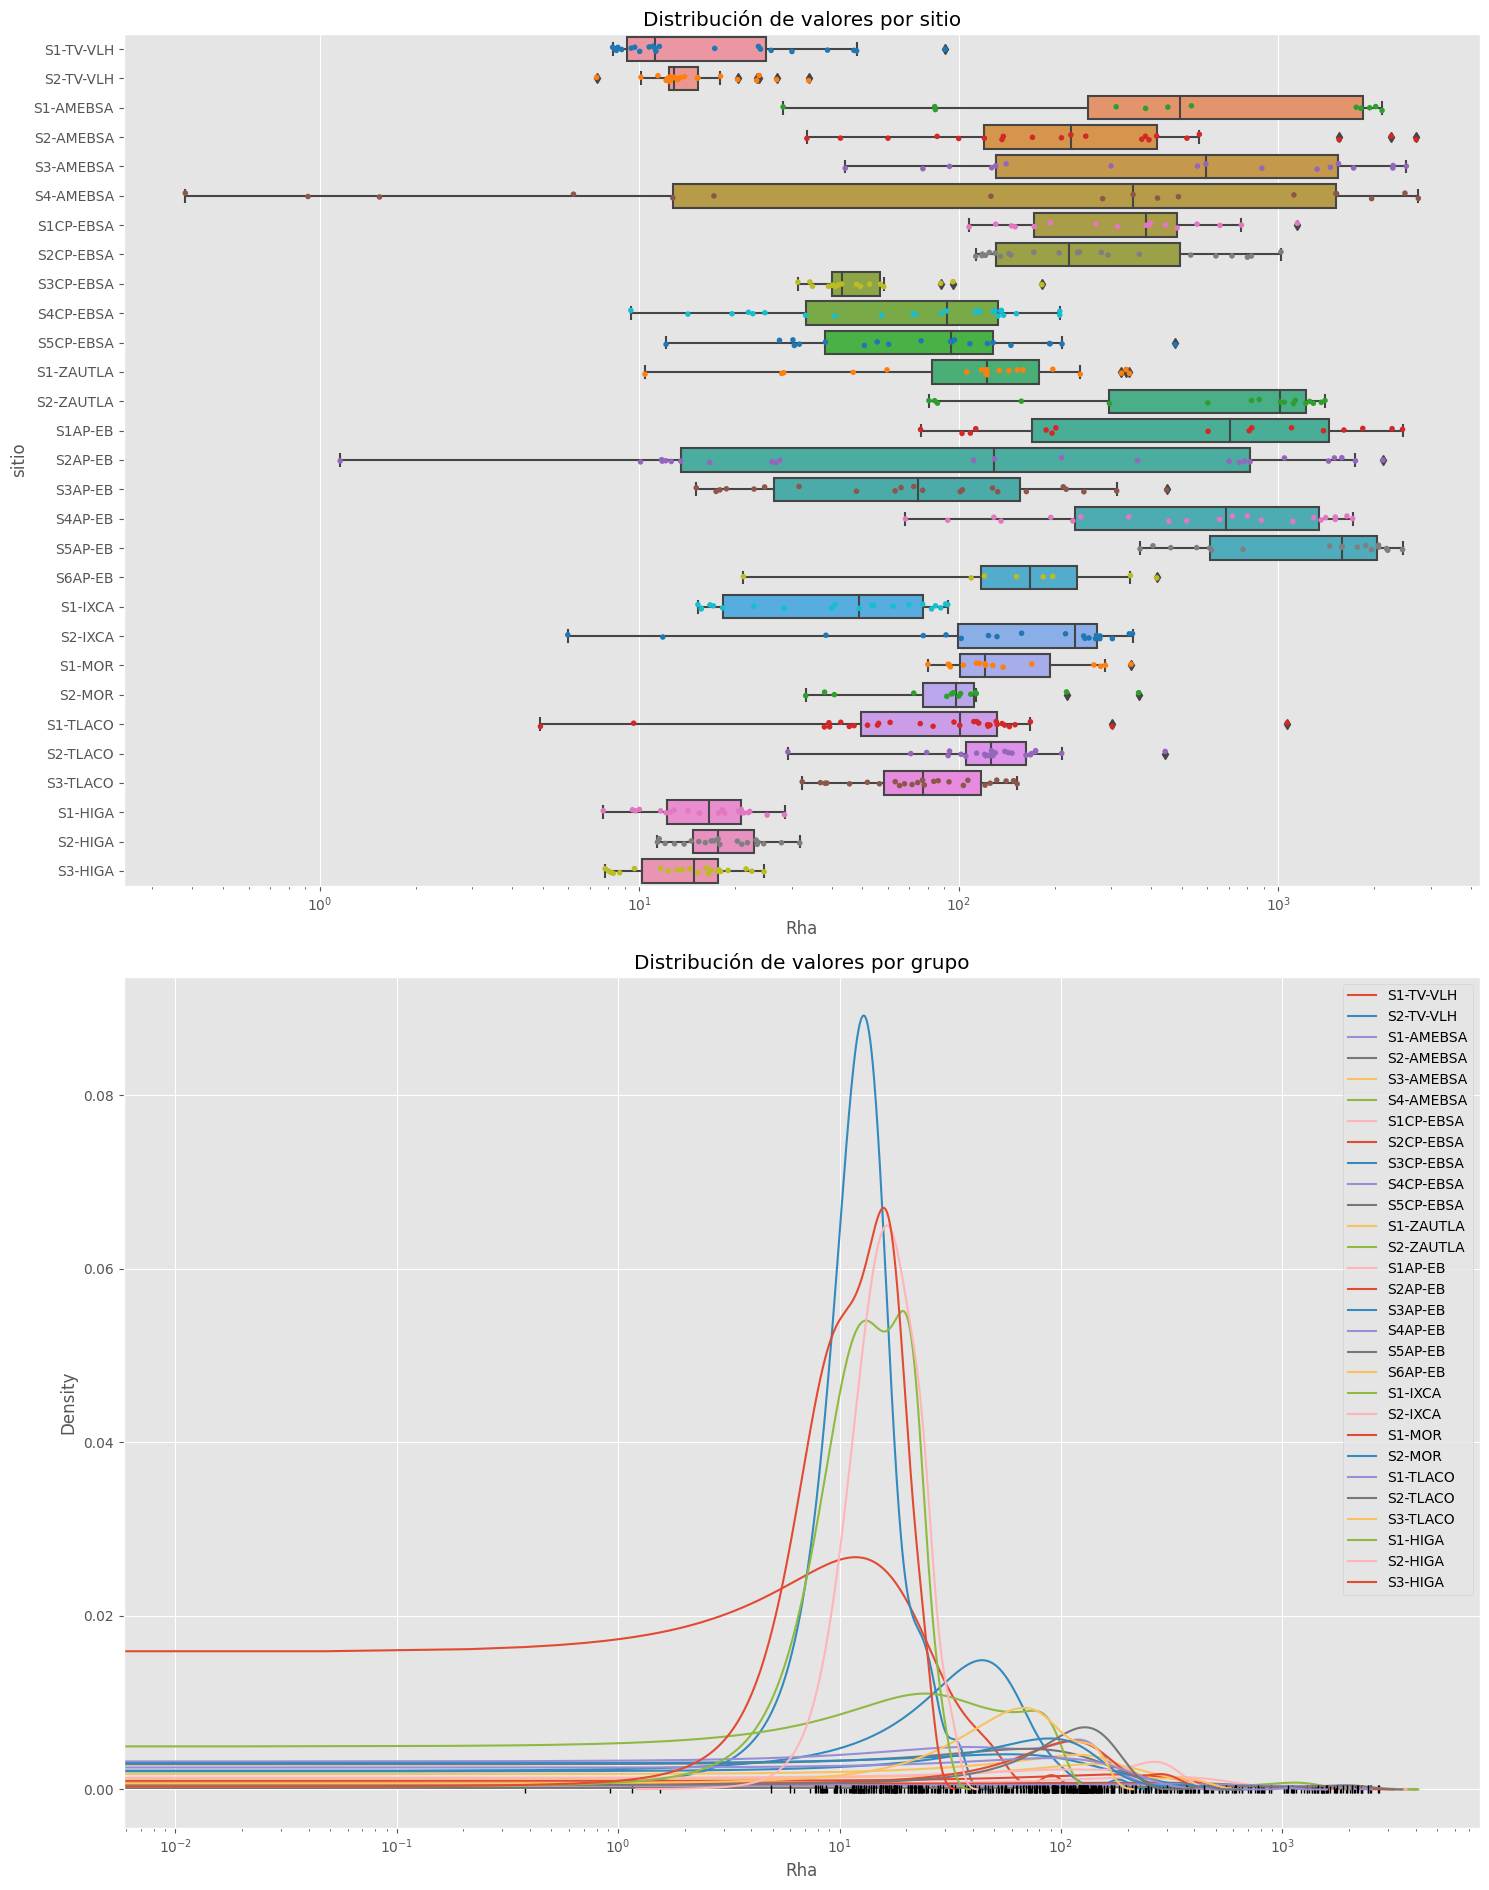

In [164]:
# Gráficos distribución observada
# ==============================================================================
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 19))
sns.boxplot(
    x     = datos.Rha,
    y     = datos.sitio,
    ax    = axs[0]
)
sns.stripplot(
    x    = datos.Rha,
    y    = datos.sitio,
    data = datos,
    size = 4,
    jitter  = True,
    palette = 'tab10',
    ax = axs[0]
)

axs[0].set_title('Distribución de valores por sitio')
axs[0].set_ylabel('sitio')
axs[0].set_xlabel('Rha')
axs[0].set_xscale('log');

for sitio in datos.sitio.unique():
    datos_temp = datos[datos.sitio == sitio]['Rha']
    datos_temp.plot.kde(ax=axs[1], label=sitio)
    axs[1].plot(datos_temp, np.full_like(datos_temp, 0), '|k', markeredgewidth=1)

axs[1].set_title('Distribución de valores por grupo')
axs[1].set_xlabel('Rha');
axs[1].legend()
axs[1].set_xscale('log')

fig.tight_layout();

In [165]:
datos.groupby(by='sitio').describe()

ESTE                                                            \
          count       mean           std        min        25%        50%   
sitio                                                                       
S1-AMEBSA  12.0  370089.22  6.079592e-11  370089.22  370089.22  370089.22   
S1-HIGA    22.0  371282.17  0.000000e+00  371282.17  371282.17  371282.17   
S1-IXCA    21.0  371188.96  0.000000e+00  371188.96  371188.96  371188.96   
S1-MOR     16.0  371497.03  0.000000e+00  371497.03  371497.03  371497.03   
S1-TLACO   31.0  371669.76  5.916984e-11  371669.76  371669.76  371669.76   
S1-TV-VLH  23.0  370462.31  1.190317e-10  370462.31  370462.31  370462.31   
S1-ZAUTLA  19.0  370965.91  0.000000e+00  370965.91  370965.91  370965.91   
S1AP-EB    16.0  370592.78  0.000000e+00  370592.78  370592.78  370592.78   
S1CP-EBSA  17.0  369285.27  0.000000e+00  369285.27  369285.27  369285.27   
S2-AMEBSA  21.0  369975.80  5.964510e-11  369975.80  369975.80  369975.80   
S2-HIGA    22.0  371062.09  5.957744e-11  371062.09  371062.09  371062.09   
S2-IXCA    20.0  371351.51  5.971980e-11  371351.51  371351.51  371351.51   
S2-MOR     14.0  371852.46  0.000000e+00  371852.46  371852.46  371852.46   
S2-TLACO   25.0  371534.15  5.940795e-11  371534.15  371534.15  371534.15   
S2-TV-VLH  25.0  370198.52  0.000000e+00  370198.52  370198.52  370198.52   
S2-ZAUTLA  17.0  370758.61  0.000000e+00  370758.61  370758.61  370758.61   
S2AP-EB    25.0  370492.10  5.940795e-11  370492.10  370492.10  370492.10   
S2CP-EBSA  22.0  369390.35  1.191549e-10  369390.35  369390.35  369390.35   
S3-AMEBSA  17.0  369854.95  0.000000e+00  369854.95  369854.95  369854.95   
S3-HIGA    22.0  370645.67  0.000000e+00  370645.67  370645.67  370645.67   
S3-TLACO   26.0  371362.26  0.000000e+00  371362.26  371362.26  371362.26   
S3AP-EB    22.0  370365.76  5.957744e-11  370365.76  370365.76  370365.76   
S3CP-EBSA  17.0  369421.77  0.000000e+00  369421.77  369421.77  369421.77   
S4-AMEBSA  17.0  369736.22  0.000000e+00  369736.22  369736.22  369736.22   
S4AP-EB    22.0  370698.15  1.191549e-10  370698.15  370698.15  370698.15   
S4CP-EBSA  25.0  369430.09  0.000000e+00  369430.09  369430.09  369430.09   
S5AP-EB    18.0  370861.34  0.000000e+00  370861.34  370861.34  370861.34   
S5CP-EBSA  21.0  371111.18  5.964510e-11  371111.18  371111.18  371111.18   
S6AP-EB     8.0  370970.01  0.000000e+00  370970.01  370970.01  370970.01   

                                NORTE              ...      RhaN            \
                 75%        max count        mean  ...       75%       max   
sitio                                              ...                       
S1-AMEBSA  370089.22  370089.22  12.0  2849714.46  ...  0.635927  0.759429   
S1-HIGA    371282.17  371282.17  22.0  2848586.46  ...  0.008083  0.011304   
S1-IXCA    371188.96  371188.96  21.0  2849350.46  ...  0.099451  0.124327   
S1-MOR     371497.03  371497.03  16.0  2850196.37  ...  0.027783  0.108633   
S1-TLACO   371669.76  371669.76  31.0  2849650.58  ...  0.051983  0.159029   
S1-TV-VLH  370462.31  370462.31  23.0  2850554.93  ...  0.008827  0.032480   
S1-ZAUTLA  370965.91  370965.91  19.0  2849902.27  ...  0.422233  0.503358   
S1AP-EB    370592.78  370592.78  16.0  2849118.76  ...  0.411078  0.764362   
S1CP-EBSA  369285.27  369285.27  17.0  2849541.66  ...  0.105286  0.366484   
S2-AMEBSA  369975.80  369975.80  21.0  2849338.50  ...  0.554800  0.971539   
S2-HIGA    371062.09  371062.09  22.0  2848287.82  ...  0.006687  0.008712   
S2-IXCA    371351.51  371351.51  20.0  2849751.98  ...  0.039432  0.131266   
S2-MOR     371852.46  371852.46  14.0  2850118.81  ...  0.049701  0.383306   
S2-TLACO   371534.15  371534.15  25.0  2849262.29  ...  0.043342  0.054664   
S2-TV-VLH  370198.52  370198.52  25.0  2850029.96  ...  0.005357  0.012062   
S2-ZAUTLA  370758.61  370758.61  17.0  2849515.87  ...  0.497969  0.880085   
S2AP-EB    370492.10  370492.10  25.0  2848816.02  ...  0.077871

In [166]:
def dif_mean(x1, x2):
  
    estadistico = np.mean(x1) - np.mean(x2)
    return(estadistico)

dif_observada = dif_mean(
    x1 = datos[datos.sitio == 'S1-HIGA']['Rha'],
    x2 = datos[datos.sitio == 'S2-HIGA']['Rha']
)
print(f"Diferencia observada: {dif_observada}")

Diferencia observada: -2.0649999999999977


In [167]:
def permutaciones(x1, x2, fun_estadistico, n_iteraciones=9999):
    '''
    Función para calcular el valor del estadístico en múltiples permutaciones
    de dos muestras.
    
    Parameters
    ----------
    x1 : numpy array
         valores de la muestra 1.
         
    x2 : numpy array
         valores de la muestra 2.
 
    fun_estadistico : function
        función que recibe como argumento las dos muestras y devuelve el valor
        del estadístico.
        
    n_iteraciones : int
        número de permutaciones calculadas (default `9999`).
        
    Returns
    -------
    distribuciones: numpy array
        valor del estadístico en cada permutación.
    '''
    
    n_x1 = len(x1)
    n_x2 = len(x2)
    pool_datos = np.hstack((x1, x2))
    
    resulados_permutaciones = np.full(shape=n_iteraciones, fill_value=np.nan)
    
    for i in tqdm(range(n_iteraciones)):
        np.random.shuffle(pool_datos)
        estadistico = fun_estadistico(pool_datos[:n_x1], pool_datos[n_x1:])
        resulados_permutaciones[i] = estadistico
        
    return resulados_permutaciones

In [168]:
dist_permut = permutaciones(
                x1 = datos[datos.sitio == 'S1-HIGA']['Rha'],
                x2 = datos[datos.sitio == 'S2-HIGA']['Rha'],
                fun_estadistico = dif_mean,
                n_iteraciones   = 9999
              )

100%|██████████| 9999/9999 [00:00<00:00, 62598.09it/s]


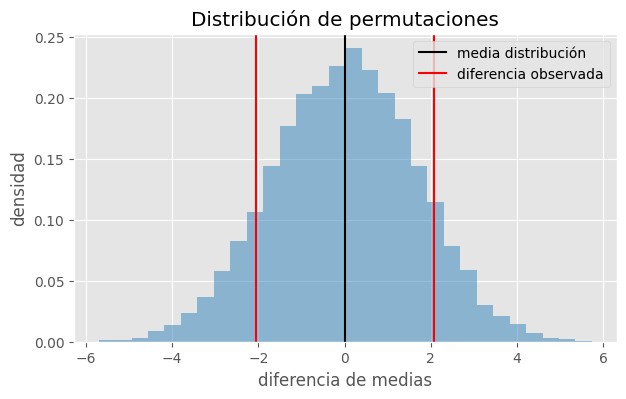

In [169]:
# Distribución de permutaciones
# ==============================================================================
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,4))
ax.hist(dist_permut, bins=30, density=True, color='#3182bd', alpha=0.5)
ax.axvline(x=dist_permut.mean(), color='black', label='media distribución')
ax.axvline(x=dif_observada, color='red', label='diferencia observada')
ax.axvline(x=-dif_observada, color='red')

ax.set_title('Distribución de permutaciones')
ax.set_xlabel('diferencia de medias')
ax.set_ylabel('densidad')
ax.legend();

calculamos el p_valor

In [170]:
# P-value empírico con y sin corrección
# ==============================================================================
p_value = (sum(np.abs(dist_permut) > np.abs(dif_observada)))/len(dist_permut)
p_value_correc = (sum(np.abs(dist_permut) > np.abs(dif_observada)) + 1)/len(dist_permut + 1)
print(f"p-value sin corrección: {p_value}")
print(f"p-value con corrección: {p_value_correc}")

p-value sin corrección: 0.21832183218321832
p-value con corrección: 0.21842184218421842


como conclusion para el grupó de estudio los sitios S1-HIGA y S2-HIGA se empleo un test de permutacion para determinar si existe una diferencia significativo entre las Resistividades promedio entre ambos sitios, Como resultado tenemos que el P-Valor calculado mediante una simulacion de montecarlo muestra evidencia no convincenter en contra de la hipotesis nula, es decir, para poder afirmar que existe una diferencia significativa entre los valores de resistividad de un mismo sitio, por lo que se requeriria analizar sitios con valores no geologicamente relacionados. no tenemos evidencia suficiente para rechazar la hipotesis nula y mucho menos afirmarla.

# Tarea 3

    1.-   Aplica los modelos de selección de características cuidando los supuestos de cada modelo
    2.-   Busca una o varias métricas para seleccionar características en literatura relacionada con tu problema (cita tus fuentes)
    3.-   Con base en tu investigación, determina las características más relevantes de tu conjunto de datos
    4.-   Discute por qué crees que las características seleccionadas son las más relevantes y por qué el resto quedaron excluidas en la selección

### 1.-

El primer metodo de seleccion de caracteristicas, empleando el analisis de varianzas o Metodo ANOVA, donde se calcula el valor F para analizar las varianzas, deacuerdo con Boque & morato (2004) ANOVA (del ingles Analysis Of Variance) es una herramienta potente para la comparacion de multiples poblaciones, asi como el estudio de la variuacion de una componente durante un proceso supervisado, en nuestro caso es conveniente ya que tenemos un conjunto de sitios que presentan una variable dependiente

la variable que analizaremos cuenta con un factor controlado y aleatorios, es decir los sondeos estan agrupados por sitios, el cual comparte caracteristicas fisicas y petrofisicas, mientras que entre los sitios existe sierta aleatoriedad ya que las condiciones geologicas y petrofisicas difieren enormemente unos de otros, a excepcion de la respueta geolectra de un acuifero.

otro punto a considerar en la influencia de mas de un factor independiente sobre el efecto resistivo de las rocas, tales como humedad, salinidad, precencia de material organico, prosidad intersticial, topografia, error de operador y porsupuesto las propiedaddes fisico quimicas de los minerales presentes en las rocas. 

para poder realiazar la prueva ANOVA se requiere cumplior con las siguinetes condiciones:

    1. Cada conjunto de datos debe ser independiente del resto. **CUMPLE CONDICION**
    2. Los resultados obtenidos para cada conjunto deben seguir una distribución normal. **NO CUMPLE CONDICION**
    3. Las varianzas de cada conjunto de datos no deben diferir de forma significativa. **CUMPLE CONDICION**

Debido a que los datos de Rha son no parametricos, es decir no presentan una distribución normal, no es factible emplear ANOVA, sin envargo se empleara a modo de prueva en ontra colubmna. 

Boqué, R., & Maroto, A. (2004). El análisis de la varianza (ANOVA) 1. Comparación de múltiples poblaciones. Téc. Lab, 294, 680-683.

In [171]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [172]:
f_anova = res_geo_copy


y = f_anova[['Rha']]

x = f_anova[['Z', 'AB', 'MN', 'ALTITUD']]
 
f_anova

,sitio,ESTE,NORTE,ALTITUD,Z,AB,MN,Rha,RhaN
0,S1-TV-VLH,370462.31,2850554.93,489,1.8,6,0.5,17.24,0.006062
1,S1-TV-VLH,370462.31,2850554.93,489,2.4,8,0.5,25.89,0.009172
2,S1-TV-VLH,370462.31,2850554.93,489,3.0,10,0.5,47.94,0.017099
3,S1-TV-VLH,370462.31,2850554.93,489,3.0,10,2.5,8.49,0.002916
4,S1-TV-VLH,370462.31,2850554.93,489,4.8,16,2.5,23.63,0.008359
...,...,...,...,...,...,...,...,...,...
642,S3-HIGA,370645.67,2848071.60,502,78.0,260,20.0,17.57,NaN
643,S3-HIGA,370645.67,2848071.60,502,84.0,280,20.0,21.61,NaN
644,S3-HIGA,370645.67,2848071.60,502,90.0,300,20.0,18.98,NaN
645,S3-HIGA,370645.67,2848071.60,502,102.0,340,20.0,24.61,NaN


In [173]:
from sklearn.feature_selection import f_regression

In [174]:
f_value = f_regression(x, y)

f_value

(array([ 1.81262853,  1.81262853,  2.97217806, 71.23868366]),
 array([1.78690045e-01, 1.78690045e-01, 8.52110854e-02, 2.27823854e-16]))

In [175]:
pass_test = []
not_pass_test = []
alpha = 0.05
for i in range(len(f_value[1])):
    print(x.columns[i], f_value[1][i])
    if f_value[1][i] < alpha:
        pass_test.append(x.columns[i])
    else:
        not_pass_test.append(x.columns[i])

Z 0.17869004480064166
AB 0.17869004480064166
MN 0.08521108536982766
ALTITUD 2.278238536639669e-16


como podemos observar el unico valor que no paso la prueva es la altitud, ya que no guarda ninguna relacion con la variable dependiente.

La base de datos, se integra de subsecciones con balores propios de profundidad, ubicacion, apertuiras electrodicas (AB y MN), asi como valores de Resistividad Aparente, apartir del analisis del histograma y de la distribucion de frecuencias por grupo, podemos definir la base de datos como no Parametrica, es decir que no sigue una distribucion Normal, es debido a esto que es necesario emplear una prueva de hipotesis que se ajuste mejor a este clase de distribuciones, el U-Test desarrollado por Mann-Whitney-Wilcoxon (referencia U-Test) y lo emplearemos para comparar la insidencia entre los sitios y la resistividad (Rha), asi como la profundidad y la resistividad (Rha), es decir el U Test "contrasta la hipotesis nula de que, dados dos valoeres x e y obtenidos aleaytoriamente de dos muestras independientes, la probabilidad de que x sea mayor que y es igual a la probabilidad de que y sea mayor que x", es didecir si las poblaciones son equidistribuidas, esto lo hace comparando las probabilidades que una poblacion sea mayor a otra, acienbdo uan comnparacion probabilistica de las distribuciones de valores.

para esto se empleara la libreria de Pingouin la cual incluye esta prueba, los datos deben cumplir con las siguientes condiciones

- Los datos dentre grupos tienen que ser independientes.
  
- Los datos tienen que ser ordinales o bien se tienen que poder ordenarse de menor a mayor.

- No es necesario asumir que las muestras se distribuyen de forma normal o que proceden de poblaciones normales. Sin embargo, para que el test compare medianas, ambas han de tener el mismo tipo de distribución (varianza, asimetría, ...).

- Igualdad de varianza entre grupos (homocedasticidad).




en este ejercicio disponemos de un total de xx sitios, cullas distribuciones se consideran n o parametricas, y cuyo tamaño es  desigual y con distribiciones no homogenias.

intalamos las librerias "seaborn" y "pingouin", asi como las librerias basicas "pandas", "numpy" y "matplotlib"

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg

emplearemos el base de datos "datos" que se compone de los siguientes elementos:

 # |  Column  | Non-Null Count | Dtype 
 | :- | -: | -: | :-: |
 0  | sitio   | 612 non-null  |  object
 1 | ESTE    | 612 non-null  |  float64
 2  | NORTE   | 612 non-null  |  float64
 3  | ALTITUD | 612 non-null  |  int64 
 4  | Z       | 612 non-null  | float64
 5  | AB      | 612 non-null  |  int64 
 6 | MN      | 612 non-null  | float64
 7  | Rha     | 612 non-null  |  float64
 8  | RhaN    |612 non-null  |  float64
 9  | dst     | 612 non-null  |  float64


como primer paso comprobamos lan condiciones, siendo necesaro que los datos presenten homocedasticidad

In [177]:
pg.homoscedasticity(data=datos, dv='Rha', group='sitio', method='levene')

,W,pval,equal_var
levene,14.144112,2.022176e-48,False


La prueba no paramétrica KRUSKAL propuesta por Kruskal-Wallis (KRUSKAL; WALLIS, 1952) es análoga a la prueba F que se emplea en el analisis de varianzas (ANOVA). Sin embargo,sin las restricciones que ANOVA impone, la prueba KRUSKAL o H-Test no impone ninguna restricción a la comparación. En este estudio, se seleccionó la prueba H-Test ó HKW ya que la hipótesis de la distribución de normalidad de los datos fue rechazada al 4% de significación estadística, verificada por la prueba de valor de p <0,01 dirante la comprobacion de homocedasticidad, para la implementacion de U-Test.

solo re recomienda el uso de HKW cuando las poblaciones coparadas sean asimetricas, La prueba HKW prueba la hipótesis nula de que la mediana de la población de todos los grupos es igual. Es una versión no paramétrica de ANOVA. La prueba funciona en 2 o más muestras independientes, que pueden tener diferentes tamaños.

Debido a la suposición de que H tiene una distribución de chi cuadrado, el número de muestras en cada grupo no debe ser demasiado pequeño. Una regla típica es que cada muestra debe tener al menos 5 mediciones.

Los valores de NaN se eliminan automáticamente.



In [178]:
from pingouin import kruskal
from pingouin import wilcoxon

In [179]:
kruskal(data=datos, dv='Rha', between='sitio')

,Source,ddof1,H,p-unc
Kruskal,sitio,28,352.985556,6.256771e-58


teniendo en consideraciopn que el 'p-unc' (Uncorrected p-value) es menor a 1%, se considera que existen evidencias suficientes para rechazar que las muestras proceden de los 28 sitios presentan la misma media, presentando una varianza 

deacuardo a la informacion obtenida es necesario aplicar un filtro pasabajas para atenuar los datos con resisitividades altas

# Tarea 4

### -1     Aplicar al menos un algoritmo no supervisado a tus datos para encontrar estructuras subyacentes



realizaremos una comparativo de sitintos modelos para identificar cual presenta el mejor ajuste e identifica las anomais que utilizamos , considerando la distribucion y los datos con los que contamos, trabajaremos con tres sitios, los cuales corresponden  a una misma area de estudio S1-HIGA, S2-HIGA y S3-HIGA , los cuales representan un sitio de estudio modelo el cual presenta un acuifero a profundidad  

In [180]:
higa

,AB,Rha
581,14,15.45
582,20,14.22
583,20,11.67
584,30,7.72
585,40,9.53
...,...,...
642,260,17.57
643,280,21.61
644,300,18.98
645,340,24.61


In [181]:
higa

datoshiga=np.array(higa)
#higa_x=np.array(higa.Rha)
datoshiga


array([[ 14.  ,  15.45],
       [ 20.  ,  14.22],
       [ 20.  ,  11.67],
       [ 30.  ,   7.72],
       [ 40.  ,   9.53],
       [ 60.  ,  10.02],
       [ 80.  ,   9.73],
       [100.  ,  12.14],
       [120.  ,  12.87],
       [140.  ,  12.53],
       [140.  ,  15.43],
       [160.  ,  18.22],
       [180.  ,  17.71],
       [200.  ,  22.2 ],
       [200.  ,  18.53],
       [220.  ,  20.86],
       [240.  ,  21.25],
       [260.  ,  20.78],
       [280.  ,  21.97],
       [300.  ,  20.48],
       [340.  ,  25.15],
       [400.  ,  28.51],
       [ 14.  ,  16.11],
       [ 20.  ,  14.56],
       [ 20.  ,  12.91],
       [ 30.  ,  11.41],
       [ 40.  ,  11.56],
       [ 60.  ,  12.06],
       [ 80.  ,  13.83],
       [100.  ,  16.81],
       [120.  ,  15.37],
       [140.  ,  17.14],
       [140.  ,  17.61],
       [160.  ,  17.67],
       [180.  ,  23.56],
       [200.  ,  17.89],
       [200.  ,  20.95],
       [220.  ,  20.29],
       [240.  ,  23.21],
       [260.  ,  21.82],


en la libreria de scikit-learn se encuentra una libreria 

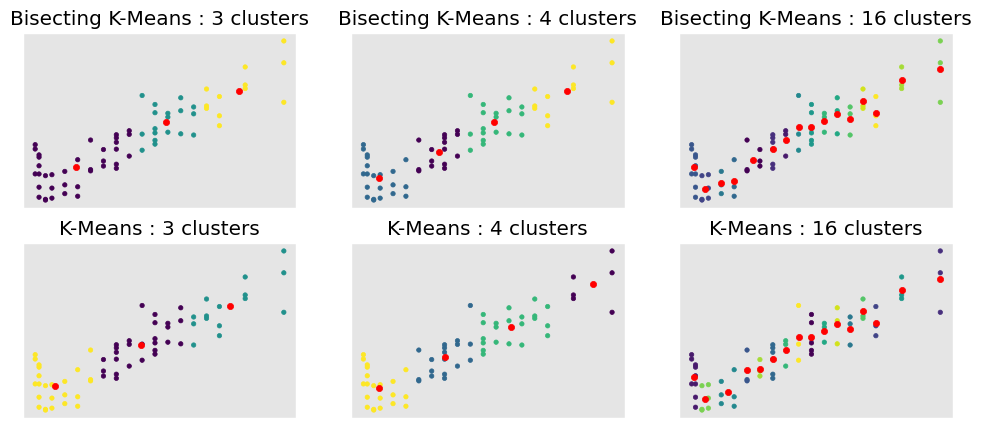

In [182]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import BisectingKMeans, KMeans


# Generate sample data
X= datoshiga

# Number of cluster centers for KMeans and BisectingKMeans
n_clusters_list = [3, 4, 16]

# Algorithms to compare
clustering_algorithms = {
    "Bisecting K-Means": BisectingKMeans,
    "K-Means": KMeans,
}

# Make subplots for each variant
fig, axs = plt.subplots(
    len(clustering_algorithms), len(n_clusters_list), figsize=(12, 5)
)

axs = axs.T

for i, (algorithm_name, Algorithm) in enumerate(clustering_algorithms.items()):
    for j, n_clusters in enumerate(n_clusters_list):
        algo = Algorithm(n_clusters=n_clusters, random_state=random_state, n_init=3)
        algo.fit(X)
        centers = algo.cluster_centers_

        axs[j, i].scatter(X[:, 0], X[:, 1], s=10, c=algo.labels_)
        axs[j, i].scatter(centers[:, 0], centers[:, 1], c="r", s=20)

        axs[j, i].set_title(f"{algorithm_name} : {n_clusters} clusters")


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

In [183]:
X

array([[ 14.  ,  15.45],
       [ 20.  ,  14.22],
       [ 20.  ,  11.67],
       [ 30.  ,   7.72],
       [ 40.  ,   9.53],
       [ 60.  ,  10.02],
       [ 80.  ,   9.73],
       [100.  ,  12.14],
       [120.  ,  12.87],
       [140.  ,  12.53],
       [140.  ,  15.43],
       [160.  ,  18.22],
       [180.  ,  17.71],
       [200.  ,  22.2 ],
       [200.  ,  18.53],
       [220.  ,  20.86],
       [240.  ,  21.25],
       [260.  ,  20.78],
       [280.  ,  21.97],
       [300.  ,  20.48],
       [340.  ,  25.15],
       [400.  ,  28.51],
       [ 14.  ,  16.11],
       [ 20.  ,  14.56],
       [ 20.  ,  12.91],
       [ 30.  ,  11.41],
       [ 40.  ,  11.56],
       [ 60.  ,  12.06],
       [ 80.  ,  13.83],
       [100.  ,  16.81],
       [120.  ,  15.37],
       [140.  ,  17.14],
       [140.  ,  17.61],
       [160.  ,  17.67],
       [180.  ,  23.56],
       [200.  ,  17.89],
       [200.  ,  20.95],
       [220.  ,  20.29],
       [240.  ,  23.21],
       [260.  ,  21.82],


### -2   Elegir alguna métrica para determinar número de grupos, usarla y discutirla

### -3   Busca alguna revista científica que publique trabajos relacionados con el tuyo


Parameters regulating groundwater inflows into hard rock tunnels—a statistical study of the Bolmen tunnel in Southern Sweden

-   Author: D. Cesano,B. Olofsson,A.C. Bagtzoglou
-   Publication: Tunnelling and Underground Space Technology
-   Publisher: Elsevier
-   Date: April–June 2000
-   Copyright © 2000 Published by Elsevier Ltd.

Referencias:

Cesano, D., Olofsson, B., & Bagtzoglou, A. C. (2000). Parameters regulating groundwater inflows into hard rock tunnels—a statistical study of the Bolmen tunnel in southern Sweden. Tunnelling and Underground Space Technology, 15(2), 153-165.

Parsekian, A. D., Claes, N., Singha, K., Minsley, B. J., Carr, B., Voytek, E., ... & Flinchum, B. (2017). Comparing measurement response and inverted results of electrical resistivity tomography instruments. Journal of Environmental and Engineering Geophysics, 22(3), 249-266.

### -4   Crea artículo mediante Latex con base en los lineamientos de la revista elegida y redacta ahí tus resultados, discusiones y bibliografía

-   listo en carpeta Articulo-Aprendizaje Automatico

### -5   Sube el código de tu tarea, los archivos de Latex y el PDF del artículo en tu repositorio, claramente diferenciados

-   listoen articulo

# Tarea 5

### 1.- Investigar sobre algoritmos supervisados que puedan aplicarse a tu problema. Da un panorama sobre el modelo matemático que emplean y explica por qué conviene utilizarlo

se empleara el metodo IsolationForest para detectar loas anomalias en la distribucion de los datos, para ello solo se emplearna datos de un solo sitio (la higa) isolation forest



### 2.- Investigar sobre métricas para analizar los errores de tus datos y discutirla (generalmente se usan MAE, MAPE, RMSE, MSE...)



### 3.- Aplicar al menos un algoritmo supervisado a tus datos para predecir alguna variable (puede ser interpolación o extrapolación)

se empleara interpolacion

### 4.- Actualiza literatura relacionada, metodología, resultados y discusión en tu artículo

-   listo en articulo

### 5.- Sube el código de tu tarea, los archivos de Latex y el PDF del artículo en tu repositorio, claramente diferenciados

-   listo en articulo

# Tarea 6

### 1.-  Generar la parte de metodología del artículo, explicando los métodos usados con base en la literatura que los sustenta.

-  listo en articulo

# Tarea 7

-   Revisa en la literatura las métricas de desempeño que se utilizan en tu problema.
-   Elige al menos una métrica para aplicar a tus modelos.
-   Reporta estos hallazgos en el marco teórico de tu artículo.

# Tarea 8

-   Realizar un diseño de experimentos para tu problema de estudio en la que indiques los niveles y tratamientos de interés.
-   Reporta en la metodología de tu artículo el diseño de experimentos que realizaste.